<a href="https://colab.research.google.com/github/rashzayn/ML-Projects/blob/main/2_audio_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install scipy==1.14.1  # Replace with the desired version

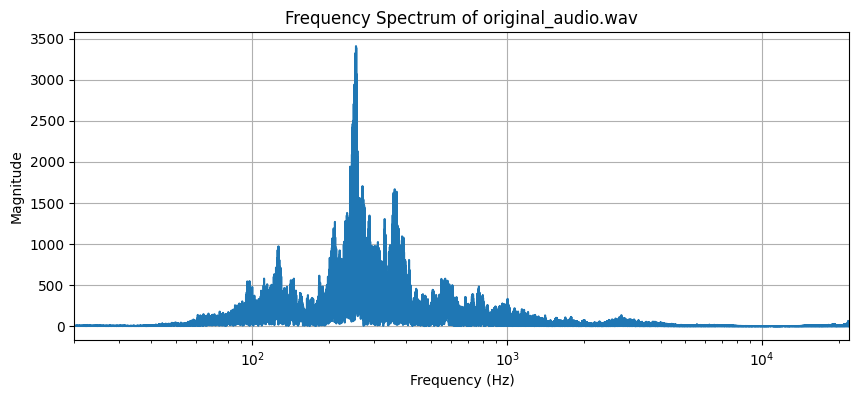

In [24]:
'''
HOME ASSIGNMENT 1 - AUDIO ANALYSIS | 2_audio_fourier file
Multimedia Computing [202402-SOC4020-001]

Completed by Rashid Zaynutdinov
U2110075 | ICE 21-01
'''


import wave
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq
from google.colab import drive

# Mount Google Drive (uncomment if the audio file is in your Drive)
# drive.mount('/content/drive', force_remount=True)

# Specify the path to your audio file (replace with your actual path)
audio_file_path = "/content/drive/MyDrive/Multimedia_Computing/original_audio.wav"

# Open the audio file and analyze
try:
    with wave.open(audio_file_path, "rb") as wav_file:
        # Extract audio parameters
        frames = wav_file.readframes(wav_file.getnframes())
        audio_data = np.frombuffer(frames, dtype=np.int16)  # Use int16 for audio data

        # Get sampling rate and channels
        sample_rate = wav_file.getframerate()

        # Normalize the audio data
        max_val = np.max(np.abs(audio_data))
        audio_data = audio_data / max_val if max_val != 0 else audio_data

        # Apply Hanning window
        window = np.hanning(len(audio_data))
        windowed_data = audio_data * window

        # Zero-padding to next power of two
        padded_length = 2**int(np.ceil(np.log2(len(windowed_data))))
        padded_data = np.pad(windowed_data, (0, padded_length - len(windowed_data)), 'constant')

        # Perform Real FFT
        fft_data = rfft(padded_data)
        freqs = rfftfreq(len(padded_data), d=1/sample_rate)

        # Calculate magnitude spectrum
        magnitude_spectrum = np.abs(fft_data)

        # Plot frequency spectrum (logarithmic scale)
        plt.figure(figsize=(10, 4))
        plt.semilogx(freqs, magnitude_spectrum)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.title("Frequency Spectrum of original_audio.wav")
        plt.grid(True)
        plt.xlim(20, sample_rate / 2)
        plt.savefig("2_audio_fourier.png", bbox_inches="tight")
        plt.show()

except FileNotFoundError:
    print(f"Error: Audio file not found at {audio_file_path}")
